In [36]:
import pandas as pd

workforce_df = pd.read_csv("workforce_data.csv")

# Preview the first few rows
print(workforce_df.head())

  Unit ID School/Corporate Staff ID Fixed Period or Ongoing  Actual Pay  \
0  Unit 2        Corporate  JWO2068                 Ongoing   $160,000    
1  Unit 2        Corporate  TQJ6864                 Ongoing   $130,000    
2  Unit 2        Corporate  OHR8109                 Ongoing    $70,000    
3  Unit 2        Corporate  TST8086                 Ongoing    $70,000    
4  Unit 2        Corporate  CON9862                 Ongoing    $70,000    

   Gender  Indigenous Dsc  Age Teaching/Non-Teaching  \
0  Female  Non-Indigenous   47              Teaching   
1  Female  Non-Indigenous   54          Non-Teaching   
2    Male  Non-Indigenous   64          Non-Teaching   
3  Female  Non-Indigenous   43          Non-Teaching   
4    Male  Non-Indigenous   53          Non-Teaching   

   Length of Service (Months)  
0                         309  
1                         295  
2                         147  
3                         249  
4                         224  


In [37]:
# Quick summary of columns, types, and non-null counts
print(workforce_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unit ID                     5219 non-null   object
 1   School/Corporate            5219 non-null   object
 2   Staff ID                    5219 non-null   object
 3   Fixed Period or Ongoing     5219 non-null   object
 4   Actual Pay                  5219 non-null   object
 5   Gender                      5219 non-null   object
 6   Indigenous Dsc              5219 non-null   object
 7   Age                         5219 non-null   int64 
 8   Teaching/Non-Teaching       5219 non-null   object
 9   Length of Service (Months)  5219 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 407.9+ KB
None


In [38]:
# Summary statistics (numerical columns)
print(workforce_df.describe())

               Age  Length of Service (Months)
count  5219.000000                 5219.000000
mean     43.689212                   90.476336
std      12.922610                  101.934760
min      18.000000                    0.000000
25%      33.000000                   14.000000
50%      43.000000                   47.000000
75%      54.000000                  143.000000
max     150.000000                 1400.000000


In [39]:
# Count missing values per column
missing = workforce_df.isnull().sum()
missing_percent = (missing / len(workforce_df)) * 100

# Combine into one report
missing_report = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_percent
})
print(missing_report[missing_report['Missing Count'] > 0])


Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []


In [40]:
# Total number of duplicates
num_duplicates = workforce_df.duplicated().sum()
print(f"Total duplicate rows: {num_duplicates}")

# View duplicate records if needed
duplicates = workforce_df[workforce_df.duplicated()]


Total duplicate rows: 0


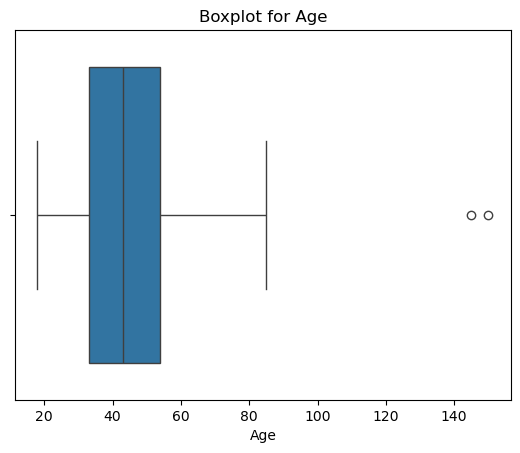

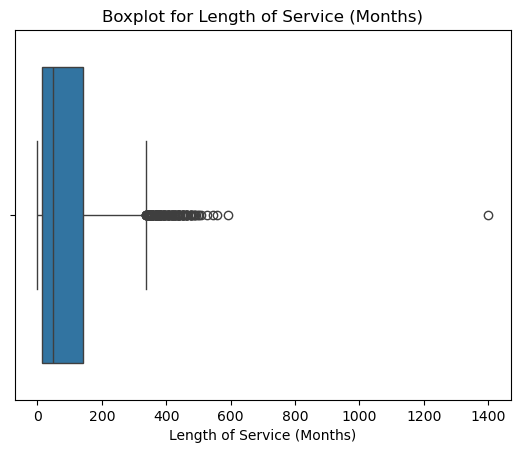

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = workforce_df.select_dtypes(include='number').columns

# Boxplots for all numeric columns
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=workforce_df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [45]:
# Feature engineering: Create LoS in Year
workforce_df['Service_Years'] = workforce_df['Length of Service (Months)'] / 12

In [46]:

# Add a calculated working start age
workforce_df['Start_Age'] = workforce_df['Age'] - workforce_df['Service_Years']

# Flag potential outliers where start age is too low (e.g., < 15)
workforce_df['Unrealistic_Service'] = workforce_df['Start_Age'] < 15

# Show records with this issue
outliers = workforce_df[workforce_df['Unrealistic_Service']]
print(outliers[['Staff ID', 'Age', 'Service_Years', 'Start_Age']])

     Staff ID  Age  Service_Years  Start_Age
5206  VKI8168   34     116.666667 -82.666667


In [47]:
# Define a function for categorizing age
def age_group(age):
    if age < 30:
        return 'Under 30'
    elif age < 40:
        return '30–39'
    elif age < 50:
        return '40–49'
    elif age < 60:
        return '50–59'
    else:
        return '60 and above'

# Apply the function to create a new column
workforce_df['Age Group'] = workforce_df['Age'].apply(age_group)

workforce_df

,Unit ID,School/Corporate,Staff ID,Fixed Period or Ongoing,Actual Pay,Gender,Indigenous Dsc,Age,Teaching/Non-Teaching,Length of Service (Months),Service_Years,Start_Age,Unrealistic_Service,Age Group
0,Unit 2,Corporate,JWO2068,Ongoing,"$160,000",Female,Non-Indigenous,47,Teaching,309,25.750000,21.250000,False,40–49
1,Unit 2,Corporate,TQJ6864,Ongoing,"$130,000",Female,Non-Indigenous,54,Non-Teaching,295,24.583333,29.416667,False,50–59
2,Unit 2,Corporate,OHR8109,Ongoing,"$70,000",Male,Non-Indigenous,64,Non-Teaching,147,12.250000,51.750000,False,60 and above
3,Unit 2,Corporate,TST8086,Ongoing,"$70,000",Female,Non-Indigenous,43,Non-Teaching,249,20.750000,22.250000,False,40–49
4,Unit 2,Corporate,CON9862,Ongoing,"$70,000",Male,Non-Indigenous,53,Non-Teaching,224,18.666667,34.333333,False,50–59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,Unit 107,Corporate,JJY8395,Ongoing,"$140,000",Male,Non-Indigenous,40,Non-Teaching,25,2.083333,37.916667,False,40–49
5215,Unit 107,Corporate,XKR3554,Ongoing,"$100,000",Female,Non-Indigenous,50,Non-Teaching,21,1.750000,48.250000,False,50–59
5216,Unit 107,Corporate,REQ9142,Fixed Period,"$95,000",Female,Non-Indigenous,30,Non-Teaching,21,1.750000,28.250000,False,30–39
5217,Unit 107,Corporate,SXF3016,Fixed Period,"$130,000",Female,Non-Indigenous,39,Non-Teaching,12,1.000000,38.000000,False,30–39


In [49]:
# Define the grouping function
def tenure_group(years):
    if years < 2:
        return 'New (<2 yrs)'
    elif years < 5:
        return '2–5 yrs'
    elif years < 10:
        return '5–10 yrs'
    else:
        return '10+ yrs'

# Apply the function
workforce_df['Tenure Group'] = workforce_df['Service_Years'].apply(tenure_group)

workforce_df


,Unit ID,School/Corporate,Staff ID,Fixed Period or Ongoing,Actual Pay,Gender,Indigenous Dsc,Age,Teaching/Non-Teaching,Length of Service (Months),Service_Years,Start_Age,Unrealistic_Service,Age Group,Tenure Group
0,Unit 2,Corporate,JWO2068,Ongoing,"$160,000",Female,Non-Indigenous,47,Teaching,309,25.750000,21.250000,False,40–49,10+ yrs
1,Unit 2,Corporate,TQJ6864,Ongoing,"$130,000",Female,Non-Indigenous,54,Non-Teaching,295,24.583333,29.416667,False,50–59,10+ yrs
2,Unit 2,Corporate,OHR8109,Ongoing,"$70,000",Male,Non-Indigenous,64,Non-Teaching,147,12.250000,51.750000,False,60 and above,10+ yrs
3,Unit 2,Corporate,TST8086,Ongoing,"$70,000",Female,Non-Indigenous,43,Non-Teaching,249,20.750000,22.250000,False,40–49,10+ yrs
4,Unit 2,Corporate,CON9862,Ongoing,"$70,000",Male,Non-Indigenous,53,Non-Teaching,224,18.666667,34.333333,False,50–59,10+ yrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,Unit 107,Corporate,JJY8395,Ongoing,"$140,000",Male,Non-Indigenous,40,Non-Teaching,25,2.083333,37.916667,False,40–49,2–5 yrs
5215,Unit 107,Corporate,XKR3554,Ongoing,"$100,000",Female,Non-Indigenous,50,Non-Teaching,21,1.750000,48.250000,False,50–59,New (<2 yrs)
5216,Unit 107,Corporate,REQ9142,Fixed Period,"$95,000",Female,Non-Indigenous,30,Non-Teaching,21,1.750000,28.250000,False,30–39,New (<2 yrs)
5217,Unit 107,Corporate,SXF3016,Fixed Period,"$130,000",Female,Non-Indigenous,39,Non-Teaching,12,1.000000,38.000000,False,30–39,New (<2 yrs)


In [50]:
workforce_df.to_csv("worforced_data_cleaned.csv", index = False)

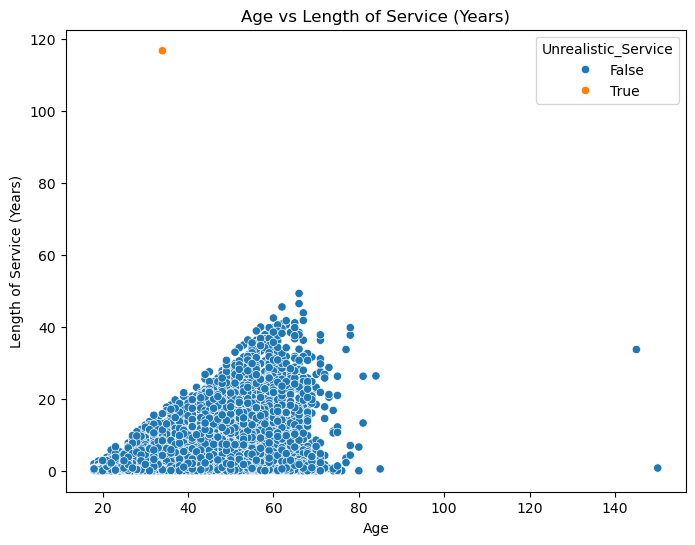

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=workforce_df, x='Age', y='Service_Years', hue='Unrealistic_Service')
plt.title('Age vs Length of Service (Years)')
plt.xlabel('Age')
plt.ylabel('Length of Service (Years)')
plt.show()


In [11]:
workforce_df

,Unit ID,School/Corporate,Staff ID,Fixed Period or Ongoing,Actual Pay,Gender,Indigenous Dsc,Age,Teaching/Non-Teaching,Length of Service (Months),Service_Years,Start_Age,Unrealistic_Service
0,Unit 2,Corporate,JWO2068,Ongoing,"$160,000",Female,Non-Indigenous,47,Teaching,309,25.750000,21.250000,False
1,Unit 2,Corporate,TQJ6864,Ongoing,"$130,000",Female,Non-Indigenous,54,Non-Teaching,295,24.583333,29.416667,False
2,Unit 2,Corporate,OHR8109,Ongoing,"$70,000",Male,Non-Indigenous,64,Non-Teaching,147,12.250000,51.750000,False
3,Unit 2,Corporate,TST8086,Ongoing,"$70,000",Female,Non-Indigenous,43,Non-Teaching,249,20.750000,22.250000,False
4,Unit 2,Corporate,CON9862,Ongoing,"$70,000",Male,Non-Indigenous,53,Non-Teaching,224,18.666667,34.333333,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,Unit 107,Corporate,JJY8395,Ongoing,"$140,000",Male,Non-Indigenous,40,Non-Teaching,25,2.083333,37.916667,False
5215,Unit 107,Corporate,XKR3554,Ongoing,"$100,000",Female,Non-Indigenous,50,Non-Teaching,21,1.750000,48.250000,False
5216,Unit 107,Corporate,REQ9142,Fixed Period,"$95,000",Female,Non-Indigenous,30,Non-Teaching,21,1.750000,28.250000,False
5217,Unit 107,Corporate,SXF3016,Fixed Period,"$130,000",Female,Non-Indigenous,39,Non-Teaching,12,1.000000,38.000000,False


In [26]:
# Example in Python
valid_service = workforce_df[workforce_df['Service_Years'] <= workforce_df['Age']]['Service_Years']
median_service = valid_service.median()

# Replace only invalid ones
workforce_df.loc[workforce_df['Service_Years'] > workforce_df['Age'], 'Service_Years'] = median_service


In [27]:
# Filter staff with age < 15 or > 100
age_outliers = workforce_df[(workforce_df['Age'] < 15) | (workforce_df['Age'] > 100)]

# Display the result
print("Employees with age < 15 or > 100:")
print(age_outliers[['Staff ID', 'Age', 'Length of Service (Months)', 'Gender', 'Teaching/Non-Teaching']])

# Optional: see how many there are
print(f"\nTotal outliers: {len(age_outliers)}")


Employees with age < 15 or > 100:
     Staff ID  Age  Length of Service (Months)  Gender Teaching/Non-Teaching
352   HBG1315  145                         404  Female              Teaching
4153  EWO9080  150                           9    Male          Non-Teaching

Total outliers: 2


In [31]:
# Step 1: Identify valid age records (between 15 and 100 inclusive)
valid_age = workforce_df[(workforce_df['Age'] >= 15) & (workforce_df['Age'] <= 100)]

# Step 2: Get the maximum valid age
max_valid_age = valid_age['Age'].max()
print(f"Maximum valid age: {max_valid_age}")

# Step 3: Replace age > 100 with max_valid_age
workforce_df.loc[(workforce_df['Age'] < 15) | (workforce_df['Age'] > 100), 'Age'] = max_valid_age


Maximum valid age: 85


In [32]:
workforce_df

,Unit ID,School/Corporate,Staff ID,Fixed Period or Ongoing,Actual Pay,Gender,Indigenous Dsc,Age,Teaching/Non-Teaching,Length of Service (Months),Service_Years,Start_Age,Unrealistic_Service,Age Group,Tenure Group
0,Unit 2,Corporate,JWO2068,Ongoing,"$160,000",Female,Non-Indigenous,47,Teaching,309,25.750000,21.250000,False,40–49,10+ yrs
1,Unit 2,Corporate,TQJ6864,Ongoing,"$130,000",Female,Non-Indigenous,54,Non-Teaching,295,24.583333,29.416667,False,50–59,10+ yrs
2,Unit 2,Corporate,OHR8109,Ongoing,"$70,000",Male,Non-Indigenous,64,Non-Teaching,147,12.250000,51.750000,False,60 and above,10+ yrs
3,Unit 2,Corporate,TST8086,Ongoing,"$70,000",Female,Non-Indigenous,43,Non-Teaching,249,20.750000,22.250000,False,40–49,10+ yrs
4,Unit 2,Corporate,CON9862,Ongoing,"$70,000",Male,Non-Indigenous,53,Non-Teaching,224,18.666667,34.333333,False,50–59,10+ yrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,Unit 107,Corporate,JJY8395,Ongoing,"$140,000",Male,Non-Indigenous,40,Non-Teaching,25,2.083333,37.916667,False,40–49,2–5 yrs
5215,Unit 107,Corporate,XKR3554,Ongoing,"$100,000",Female,Non-Indigenous,50,Non-Teaching,21,1.750000,48.250000,False,50–59,New (<2 yrs)
5216,Unit 107,Corporate,REQ9142,Fixed Period,"$95,000",Female,Non-Indigenous,30,Non-Teaching,21,1.750000,28.250000,False,30–39,New (<2 yrs)
5217,Unit 107,Corporate,SXF3016,Fixed Period,"$130,000",Female,Non-Indigenous,39,Non-Teaching,12,1.000000,38.000000,False,30–39,New (<2 yrs)


In [35]:
workforce_df.to_csv("worforced_data_cleaned.csv", index = False)